# 제약조건

* 테이블을 만들 때는 테이블의 구조에 필요한 제약조건을 설정해줘야 한다.
* 기본 키와 외래 키가 대표적인 제약조건이다.
* 중복되지 않는 열에는 고유 키를 지정할 수 있다.
* 실수로 입력하는 것을 방지하는 체크 제약조건이 있다.
* 매번 입력하기 귀찮은 데이터의 경우 기본값으로 설정할 수 있다.
* 값을 꼭 입력해야 하는 NOT NULL 제약조건이 있다.

## 제약조건의 기본 개념과 종류

* **제약조건**: 데이터의 무결성을 지키기 위해 제한하는 조건
* 데이터 무결성 -> 데이터에 결함이 없음
* 예를 들어, 네이버 회원의 아이디가 중복되면 이메일, 블로그, 쇼핑 기록 등 상당한 혼란이 발생할 것이다.
* 이러한 결함을 미리 방지하기 위해서 회원 테이블의 아이디를 기본 키로 지정할 수 있다.
* 기본 키의 조건은 '중복되지 않고, 비어 있지도 않음'이므로, 실수로 중복된 아이디를 넣으려고 해도 입력 조차 불가능하다.

#### MySQL에서 제공하는 대표적인 제약조건

* PRIMARY KEY 제약조건
* FOREIGN KEY 제약조건
* UNIQUE 제약조건
* CHECK 제약조건
* DEFAULT 정의
* NULL 값 허용

## 기본 키 제약조건

* 테이블에는 많은 행이 존재 -> 이 중에서 데이터를 구분할 수 있는 식별자를 기본 키라고 한다.
* 회원 테이블의 아이디, 학생 테이블의 학번, 직원 테이블의 사번 등이 해당됨
* 기본 키에 입력되는 값은 중복될 수 없으며, NULL값이 입력될 수 없다.
* 간혹 특정 인터넷 쇼핑몰에서는 설계 방법에 따라 아이디가 아닌 다른 열을 기본 키로 지정하는 경우도 존재한다.
* 기본 키는 중복되지 않고, 비어 있지 않으면 되기 때문에 최근에는 주민등록번호나 Email 또는 휴대폰 번호 등으로 지정해서 회원을 구분하는 사이트도 많이 등장하는 추세임
* 테이블은 기본 키를 1개만 가질 수 있음 -> 테이블의 특성을 가장 잘 반영하는 열을 선택

### CREATE TABLE에서 설정하는 기본 키 제약조건

* CREATE TABLE문에 PRIMARY KEY 예약어를 설정해준다.
* 예시 연습을 위해 회원 테이블과 구매 테이블의 일부 열을 생략하여 진행

In [ ]:
# 기본 키 설정
USE naver_db;
DROP TABLE IF EXISTS buy, member;
CREATE TABLE member
# 열 이름 뒤에 PRIMARY KEY를 붙여주면 기본 키로 설정됨
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL
);

### 테이블을 삭제하는 순서

* 회원 테이블과 구매 테이블은 기본 키-외래 키로 연결되어 있다. 즉, 회원 테이블의 회원만 구매 테이블에 입력될 수 있다.
* 만약 구매 테이블이 있는데 회원 테이블을 삭제(DROP)하게 된다면 구매 테이블의 BLK이름과 연락처를 알고 싶어도 회원 테이블은 이미 삭제되었기 때문에 알 수 있는 방법이 없다.
* 따라서 기본 키-외래 키 관계로 연결된 테이블은 외래 키가 설정된 테이블을 먼저 삭제해야 한다.

In [ ]:
# 테이블의 정보확인
DESCRIBE member;

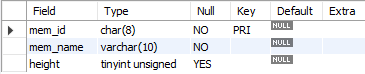

In [ ]:
# PRIMARY KEY를 지정하는 다른 방법
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL,
# 테이블의 제일 마지막에 PRIMARY KEY(열_이름)을 붙여주면 그 열이 기본 키로 설정됨
PRIMARY KEY (mem_id)
);

### ALTER TABLE에서 설정하는 기본 키 제약조건

* 제약조건을 설정하는 또 다른 방법은 이미 만들어진 테이블을 수정하는 ALTER TABLE 구문을 사용하는 것이다.

In [ ]:
# ALTER TABLE에서 설정하는 제약 조건
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL
);
# ALTER TABLE 문으로 기본 키를 설정할 수 있음
ALTER TABLE member
ADD CONSTRAINT
PRIMARY KEY (mem_id);

### 기본 키에 이름 지정하기

In [ ]:
# 기본 키에 이름 저장하기
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL,
CONSTRAINT PRIMARY KEY PK_member_mem_id (mem_id)
);

## 외래 키 제약조건

* 외래 키 제약조건은 두 테이블 사이의 관계를 연결해주고, 그 결과 데이터의 무결성을 보장해주는 역할을 한다.
* 외래 키가 설정된 열은 꼭 다른 테이블의 기본 키와 연결된다.
* 기본 키가 있는 회원 테이블을 기준 테이블이라고 부르며, 외래 키가 있는 구매 테이블을 참조 테이블이라고 부른다.
* 이전 실습에서 구매 테이블에 APN(에이핑크)을 입력할 때, 오류가 발생했던 것은 외래 키 제약조건을 위반했기 때문임
* 참조 테이블이 참조하는 기준 테이블의 열은 반드시 기본 키나, 고유 키로 설정되어 있어야 한다.

### CREATE TABLE에서 설정하는 외래 키 제약조건

* 외래 키를 생성하는 방법은 CREATE TABLE 끝에 FOREIGN KEY 키워드를 생성하는 것이다.
* 외래 키의 형식은 FOREIGN KEY(열_이름) REFERENCES 기준_테이블(열_이름)이다.
* 이 예시에서는 구매 테이블의 열이 참조하는 기준 테이블의 열은 기본 키로 설정되어 있는 것을 알 수 있다.

In [ ]:
# CREATE TABLE에서 설정하는 외래 키 제약조건
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL
);

CREATE TABLE buy
(num INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
num_id CHAR(8) NOT NULL,
prod_name CHAR(6) NOT NULL,
FOREIGN KEY(mem_id) REFERENCES member(mem_id)
);

#### 기준 테이블의 열 이름과 참조 테이블의 열 이름

* '네이버 쇼핑'의 예시에서는 기준 테이블의 열 이름(mem_id)과 참조 테이블의 열 이름(mem_id)이 동일하지만 꼭 같을 필요는 없다.
* 즉, 참조 테이블의 아이디 열 이름이 user_id와 같이 기준 테이블의 mem_id와 달라도 상관없다.

In [ ]:
# 열 이름이 다른경우
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL
);

CREATE TABLE buy
(num INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
user_id CHAR(8) NOT NULL,
prod_name CHAR(6) NOT NULL,
# 외래 키를 설정하는 형식은 FOREIGN KEY(열_이름) REFERENCES 기준_테이블(열_이름)
FOREIGN KEY(user_id) REFERENCES member(mem_id)
);

### ALTER TABLE에서 설정하는 외래 키 제약조건

* 외래 키를 설정하는 다른 방법은 ALTER TABLE구문을 이용하는 것이다.

In [ ]:
# ALTER TABLE에서 설정하는 외래 키 제약조건
DROP TABLE IF EXISTS buy;
CREATE TABLE buy
(num INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
mem_id CHAR(8) NOT NULL,
prod_name CHAR(6) NOT NULL
);
ALTER TABLE buy
ADD CONSTRAINT
FOREIGN KEY(mem_id)
REFERENCES member(mem_id);

### 기준 테이블의 열이 변경될 경우

* 회원 테이블의 BLK가 물품을 2번 구매한 상태에서 회원 아이디를 PINK로 변경하게 되는 경우를 생각해보자. 이 경우, 두 테이블의 정보가 일치하지 않게 된다.
  

In [ ]:
# 데이터 삽입
INSERT INTO member VALUES('BLK', '블랙핑크', 163);
INSERT INTO buy VALUES(NULL, 'BLK', '지갑');
INSERT INTO buy VALUES(NULL, 'BLK', '맥북');

In [ ]:
# 내부 조인 사용
SELECT M.mem_id, M.mem_name, B.prod_name
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id;

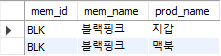

* BLK의 아이디를 PINK로 변경하게 되면 오류가 발생한다.
* 기본 키-외래 키로 맺어진 후에는 기준 테이블의 열 이름이 변경되지 않는다. 열 이름이 변경되면 참조 테이블의 데이터에 문제가 발생하기 때문이다.

In [ ]:
# BLK의 아이디를 PINK로 변경
UPDATE member SET mem_id = 'PINK' WHERE mem_id = 'BLK';

In [ ]:
# 삭제도 수행해보면 오류가 발생한다
DELETE FROM member WHERE mem_id = 'BLK';

* ON UPDATE CASCADE문을 사용하게 된다면 회원 테이블의 BLK가 PINK로 변경되면 자동으로 구매 테이블의 BLK도 PINK로 변경할 수 있다.
* ON DELETE CASCADE문은 기준 테이블의 데이터가 삭제되면 참조 테이블의 데이터도 삭제되는 기능이다.

In [ ]:
# 테이블 재생성하고 ALTER TABLE문을 수행
DROP TABLE IF EXISTS buy;
CREATE TABLE buy
(num INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
mem_id CHAR(8) NOT NULL,
prod_name CHAR(6) NOT NULL
);
ALTER TABLE buy
ADD CONSTRAINT
FOREIGN KEY(mem_id) REFERENCES member(mem_id)
ON UPDATE CASCADE
ON DELETE CASCADE;

In [ ]:
# 구매 테이블에 데이터 다시 입력
INSERT INTO buy VALUES(NULL, 'BLK', '지갑');
INSERT INTO buy VALUES(NULL, 'BLK', '맥북');

In [ ]:
# 이젠 회원 테이블의 PINK로 변경하면 오류가 발생하지 않을 것이다
UPDATE member SET mem_id = 'PINK' WHERE mem_id = 'BLK';

In [ ]:
# 다시 조인을 수행
# ON CASCADE UPDATE가 설정되면 기준 테이블이 변경될 때 참조 테이블도 자동으로 변경된다
SELECT M.mem_id, M.mem_name, B.prod_name
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id;

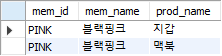

In [ ]:
# PINK가 탈퇴한 것으로 가정하고 기준 테이블에서 삭제 수행
DELETE FROM member WHERE mem_id = 'PINK';

* 구매 테이블의 데이터를 확인하면 아무것도 없는것을 알 수 있다.

In [ ]:
SELECT * FROM buy;

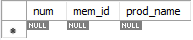

## 기타 제약조건

### 고유 키 제약조건

* **고유 키(UNIQUE)** 제약조건: 중복되지 않는 유일한 값을 입력해야 하는 조건
* 기본 키 제약조건과 유사하지만, 차이점은 고유 키 제약조건은 NULL값을 허용한다는 것이다.
* NULL값은 여러 개가 입력되어도 상관없음
* 기본 키는 테이블에 1개만 설정해야 하지만, 고유 키는 여러 개를 설정해도 된다.

In [ ]:
# 고유 키 제약조건
DROP TABLE IF EXISTS buy, member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL,
email CHAR(30) NULL UNIQUE
);

In [ ]:
# 데이터 입력
INSERT INTO member VALUES('BLK', '블랙핑크', 163, 'pink@gmail.com');
INSERT INTO member VALUES('TWC', '트와이스', 167, NULL);
INSERT INTO member VALUES('APN', '에이핑크', 164, 'pink@gmail.com');

* 세 번째 행은 이메일이 중복되기 때문에 오류가 발생한다.

### 체크 제약조건

* 입력되는 데이터를 점검하는 기능
* 예를 들어 평균 키에 마이너스 값이 입력되지 않도록 하거나, 연락처의 국번에 02, 031, 041, 055중 하나만 입력되도록 할 수 있다.

In [ ]:
# CHECK 조건 수행
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
# 평균 키는 반드시 100이상의 값만 입력되도록 설정
height TINYINT UNSIGNED NULL CHECK (height >= 100),
phone1 CHAR(3) NULL
);

In [ ]:
# 데이터 삽입
INSERT INTO member VALUES('BLK', '블랙핑크', 163, NULL);
INSERT INTO member VALUES('TWC', '트와이스', 99, NULL);

* 두 번째 행은 체크 제약조건에 위배되므로 오류가 발생한다.
* Check constraint 오류는 체크 제약조건에서 설정한 값의 범위를 벗어났기 때문에 발생한 것임

In [ ]:
# ALTER문으로 제약조건을 추가
ALTER TABLE member
ADD CONSTRAINT
# IN()은 괄호 안에 있는 값 중 하나와 같아야 참이 된다.
CHECK(phone1 IN ('02', '031', '032', '054', '055', '061'));

In [ ]:
# 데이터 삽입
INSERT INTO member VALUES('TWC', '트와이스', 167, '02');
INSERT INTO member VALUES('OMY', '오마이걸', 167, '010');

* 두 번째 행은 체크 제약조건에 위배되므로 오류가 발생
* 체크 제약조건을 설정한 후에 조건에 위배되는 값을 입력하면 오류가 발생한다.

### 기본값 정의

* 값을 입력하지 않았을 때 자동으로 입력될 값을 미리 지정해 놓는 방법

In [ ]:
# 키를 입력하지 않고 기본적으로 160이라고 입력되도록 하고자 할 때
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
height TINYINT UNSIGNED NULL DEFAULT 160,
phone1 CHAR(3) NULL
);

In [ ]:
# ALTER TABLE 사용 시 DEFAULT 지정
ALTER TABLE member
ALTER COLUMN phone1 SET DEFAULT '02';

* 기본값이 설정된 열에 기본값을 입력하려면 default로 써주고, 원하는 값을 입력하려면 해당 값을 써주면 된다.

In [ ]:
# 데이터 입력
INSERT INTO member VALUES('RED', '레드벨벳', 161, '054');
# 기본값을 설정한 후에 default로 지정하면 설정된 기본값이 입력된다
INSERT INTO member VALUES('SPC', '우주소녀', default, default);
SELECT * FROM member;

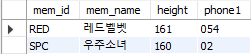

### 널 값 허용

* 널(NULL)값을 허용하면 생략하거나 NULL을 사용하고, 허용하지 않으려면 NOT NULL을 사용한다.
* PRIMARY KEY가 설정된 열에는 NULL값이 있을 수 없으므로 생략하면 자동으로 NOT NULL로 인식된다.
* NULL값은 '아무 것도 없다'라는 의미, 공백('')이나 0과는 다르다는 점에 주의